In [3]:
import numpy as np 
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1) # go have 100 rows of [0, 1)s
y = 4 + 3 * X + np.random.rand(100, 1) # 

X_b = np.c_[np.ones]

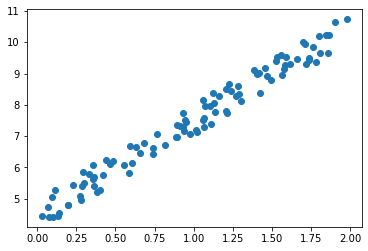

In [4]:
plt.scatter(X,y)

In [5]:
# we have used y = 4 + 3x + gaussian noise to generate the data.

In [6]:
# np.ones((100, 1)) generate 100 rows of 1 column of ones 
X_b = np.c_[np.ones((100,1)), X] # add first column of 1s to X 

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)



In [7]:
theta_best 

array([[4.44923816],
       [3.07037007]])

In [8]:
# not bad, quite close to the original 4 + 3x ....

In [9]:
X_new = np.array([[0], [2]])
print(X_new)
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

[[0]
 [2]]


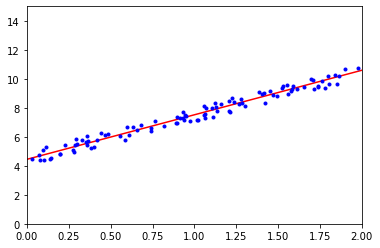

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [11]:
# linear regression using sklearn 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

# it returns the same results



(array([4.44923816]), array([[3.07037007]]))

<h2>Time complexity is roughly O(n^2)</h2>

<h1>For things that use too much memory, we could use... Gradient Descent</h1>

In [12]:
# this is batch gradient descent 

eta = 0.1 # learning rate 

n_iterations = 1000

m = 100

theta = np.random.randn(2,1) # random initialization

In [13]:
# we take 2 points because there will always be a global minimum 



In [14]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[4.44923816],
       [3.07037007]])

In [16]:
# stochastic gradient descent (random)


# use this whwne the training set is too much 

n_epochs = 50 
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    # from 0 ~ 49 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [17]:
theta

array([[4.45997658],
       [3.05000323]])

In [18]:
# pretty good too.... 
# lets try to use sklearn 

In [19]:
from sklearn.linear_model import SGDRegressor


sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.44010409]), array([3.0889747]))

In [21]:
# mini batch gradient descent is essentlaly a combination of both 

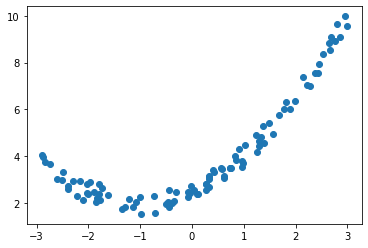

In [22]:
# Polynomial REGRESSION

m = 100 
X = 6 * np.random.rand(m,1) - 3 

y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1) 
# this is y = 0.5X^2 + X + 2 + gaussian noise 

plt.scatter(X, y)


In [23]:
from sklearn.preprocessing import PolynomialFeatures 

poly_features = PolynomialFeatures(degree = 2, include_bias = False)

X_poly = poly_features.fit_transform(X)


lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.50402765]), array([[1.00635846, 0.49842446]]))

In [24]:
y_predicted = lin_reg.predict(X_poly)

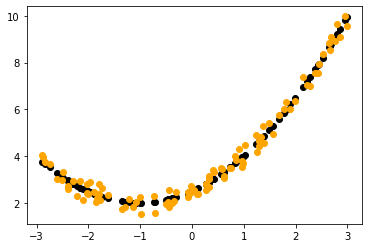

In [25]:
plt.scatter(X, y_predicted, color = "black")
plt.scatter(X, y, color = "orange")

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    print(train_errors)
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
    plt.legend()
    

[0.0, 0.0, 0.04729228265479273, 0.13643935092977416, 1.0539253723652924, 0.8916962193823746, 1.1033363843201405, 1.2098100876048554, 1.0833527669013225, 1.059810344615866, 1.0344547094013468, 0.9625494552888129, 1.1871592541850373, 1.3650522500282976, 1.3636127053927274, 1.305133871184382, 1.336906729482962, 1.3696887471988128, 1.2989498461681381, 1.3074971636422312, 1.3164853431735561, 1.3570126915109908, 1.5088377594299849, 1.494901118904453, 2.104893672347781, 2.029979957076438, 1.9792296908077334, 1.9725642795312763, 1.9361722380622388, 1.8800164780444375, 1.8436034793878544, 1.9857716257349263, 1.9635720974415467, 1.9371942278373633, 1.932827324178124, 1.9511013365301915, 1.9426984211437026, 1.979851451152223, 1.9496899815419677, 1.9616031605516409, 2.120537989749277, 2.1496795998410567, 2.1001870036160213, 2.1075656716588327, 2.07421006630528, 2.033190702623932, 1.9928836226873403, 1.9814618912987962, 1.9806704873351257, 1.94191028644762, 1.903835214390296, 1.8727815767925184, 1.

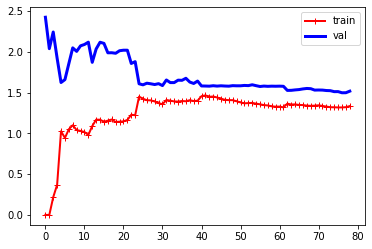

In [42]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# so the trainsetSize is plotted vs RMSE 

In [38]:
# this is if the training set is under fitting because both RMSE errors are huge 

In [ ]:
# thus, we need to use a more complex model 

In [43]:
from sklearn.pipeline import Pipeline 

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()),
])

[0.0, 3.944304526105059e-31, 2.2955852341931444e-28, 3.396742662548153e-24, 1.5965031134254432e-23, 5.087761695143354e-25, 1.68917884079655e-25, 1.333952777490937e-24, 5.290355008060955e-24, 9.194405775457027e-25, 1.2117310075933829e-21, 0.00026678409129852977, 0.00037301859697219403, 0.0060290760512262545, 0.005992365335761801, 0.03604754527664697, 0.048019804072427695, 0.051694892607508855, 0.060440782504285064, 0.05969373700115144, 0.058934597373206776, 0.05793966949812673, 0.058235624685739944, 0.05585746175899031, 0.053972379123791416, 0.053189186850148215, 0.05615709345547265, 0.054972162338961676, 0.054122953424099556, 0.05260234218095946, 0.0523104667608994, 0.05165195602956091, 0.05375113705529375, 0.052865119223065415, 0.05601089045994238, 0.0569154161662391, 0.055432453105687354, 0.053974454226193944, 0.05300918913980329, 0.053277252485196526, 0.05208785388060202, 0.05220868166492966, 0.05298859910660665, 0.05227900019179622, 0.05327955461492554, 0.052953237118952175, 0.0526

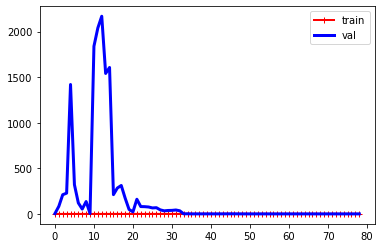

In [44]:
plot_learning_curves(polynomial_regression, X, y)

In [45]:
# well the training data here is significantly better than the validation set, hence it is overfitting here...

<h2>Logistic Regression</h2>

In [48]:
from sklearn import datasets 

iris = datasets.load_iris()
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [49]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [50]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [58]:
X = iris["data"][:, 3:]

In [59]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [60]:
y = (iris["target"] == 2).astype(np.int)

C:\Users\admin\AppData\Local\Temp\ipykernel_27824\3764238078.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


In [61]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
from sklearn.linear_model import LogisticRegression

log_reg =  LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()